In [1]:
# !kaggle datasets download -d thedevastator/canine-intelligence-and-size


  0%|          | 0.00/4.10k [00:00<?, ?B/s]
100%|██████████| 4.10k/4.10k [00:00<00:00, 842kB/s]


In [17]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [3]:
# with zipfile.ZipFile('canine-intelligence-and-size.zip', 'r') as zip_ref:
#     zip_ref.extractall()

In [5]:
breed_info = pd.read_csv('AKC Breed Info.csv')

In [6]:
breed_info.head()

,index,Breed,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs
0,0,Akita,26,28,80,120
1,1,Anatolian Sheepdog,27,29,100,150
2,2,Bernese Mountain Dog,23,27,85,110
3,3,Bloodhound,24,26,80,120
4,4,Borzoi,26,28,70,100


In [28]:
dog_info = pd.read_csv('dog_intelligence.csv')

In [9]:
dog_info.head()

,index,Breed,Classification,obey,reps_lower,reps_upper
0,0,Border Collie,Brightest Dogs,95%,1,4
1,1,Poodle,Brightest Dogs,95%,1,4
2,2,German Shepherd,Brightest Dogs,95%,1,4
3,3,Golden Retriever,Brightest Dogs,95%,1,4
4,4,Doberman Pinscher,Brightest Dogs,95%,1,4


In [29]:
whole_info = dog_info.merge(breed_info, on='Breed')

In [11]:
whole_info.head()

,index_x,Breed,Classification,obey,reps_lower,reps_upper,index_y,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs
0,0,Border Collie,Brightest Dogs,95%,1,4,60,19,21,40,40
1,3,Golden Retriever,Brightest Dogs,95%,1,4,40,21,24,55,75
2,4,Doberman Pinscher,Brightest Dogs,95%,1,4,33,26,28,60,100
3,6,Labrador Retriever,Brightest Dogs,95%,1,4,45,21,24,55,80
4,7,Papillon,Brightest Dogs,95%,1,4,145,8,11,5,10


In [13]:
whole_info['Breed'].value_counts()

Border Collie                    1
Cavalier King Charles Spaniel    1
Boston Terrier                   1
Irish Terrier                    1
Welsh Terrier                    1
                                ..
Australian Terrier               1
Newfoundland                     1
Field Spaniel                    1
Samoyed                          1
Afghan Hound                     1
Name: Breed, Length: 105, dtype: int64

In [15]:
whole_info['Breed'].count()

105

In [16]:
whole_info['Classification'].unique()

array(['Brightest Dogs', 'Excellent Working Dogs',
       'Above Average Working Dogs',
       'Average Working/Obedience Intelligence',
       'Fair Working/Obedience Intelligence',
       'Lowest Degree of Working/Obedience Intelligence '], dtype=object)

In [40]:
whole_info['obey'] = whole_info['obey'].fillna('0%')

In [41]:
whole_info[whole_info['obey'].apply(lambda x: isinstance(x,float))]

,index_x,Breed,Classification,obey,reps_lower,reps_upper,index_y,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs


In [42]:
whole_info['obey_perc'] = whole_info['obey'].apply(lambda x: float(x.replace('%',''))/100)

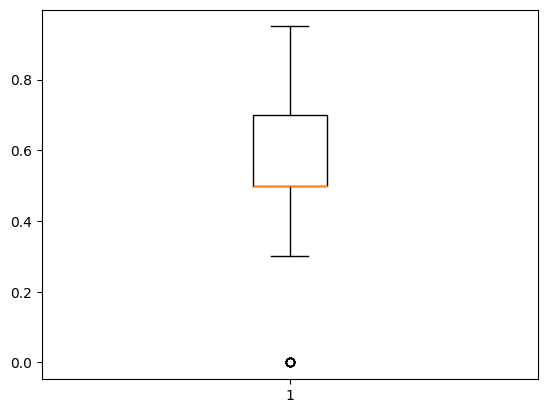

In [44]:
fig, ax = plt.subplots()
ax.boxplot(whole_info['obey_perc'])
plt.show()

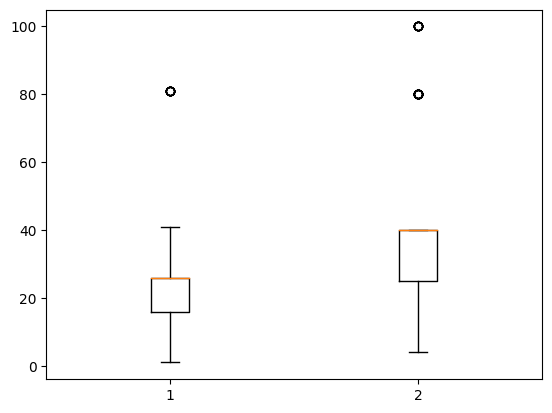

In [46]:
fig, ax = plt.subplots()
ax.boxplot([whole_info['reps_lower'],whole_info['reps_upper']])
plt.show()